In [2]:
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append("../Functions")
from GS_waves import select_freq_range
from abtem.waves import PlaneWave
from Column_matching import (
    inv_Bessel,
    Bessel_transform
    )
from Defocus_circle import generate_continious_phase
import Generate_structure
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from circle_fit import least_squares_circle
from Complex_Gaussian import (
    Gaussian_fitting,
    Gaussian_in_focus,
    Gaussian_function,
    Modified_Gaussian_fitting,
    Gaussian_function_partition
)

In [3]:
#Parameters to set
gmin = 0; gmax = 2; sampling = 0.0656015; energy = 300e3
a = 4.05; length = 50
#Results from isolated column
max_thickness = 80
thickness_range = np.arange(2, max_thickness, 1)
theta = np.linspace(0, 2*np.pi, 100)
cmap = plt.get_cmap("plasma")
coeff_rec = []
recover_rec = []
results_rec = []
for thickness in tqdm(thickness_range):
    n_repeat = 2
    structure = Generate_structure.generate_periodic_fcc("Al", a, n_repeat, n_repeat, thickness)
    exitwave = select_freq_range(np.array(PlaneWave(sampling=sampling, energy=energy).multislice(structure).array),
                            gmin, gmax, sampling)
    m, n = exitwave.shape
    exitwave = exitwave[(n_repeat*2-1)*m//(n_repeat*4):(n_repeat*2+1)*m//(n_repeat*4),
                        (n_repeat*2-1)*n//(n_repeat*4):(n_repeat*2+1)*n//(n_repeat*4)]
    results, components = Bessel_transform(exitwave-1, sampling, gmin+0.01, gmax, length, x0=sampling/2, y0=sampling/2)
    results_rec.append(results)
    krange = np.linspace(gmin+0.01, gmax, length)
    coeff = Modified_Gaussian_fitting(results, krange)
    recover = Gaussian_function_partition(coeff, krange)
    coeff_rec.append(coeff)
    recover_rec.append(recover)
coeff_rec = np.array(coeff_rec)
recover_rec = np.array(recover_rec)
results_rec = np.array(results_rec)

100%|██████████| 78/78 [00:39<00:00,  1.96it/s]


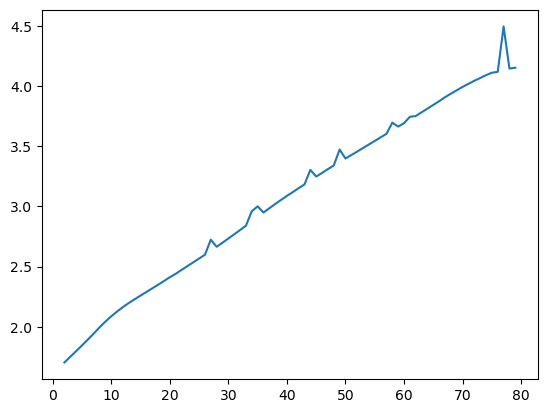

In [4]:
plt.plot(thickness_range, generate_continious_phase(coeff_rec[:,2]+1j*coeff_rec[:,3]))
#plt.axis("square")
plt.show()

In [5]:
np.min(coeff_rec[:,1])

0.5317703562388945

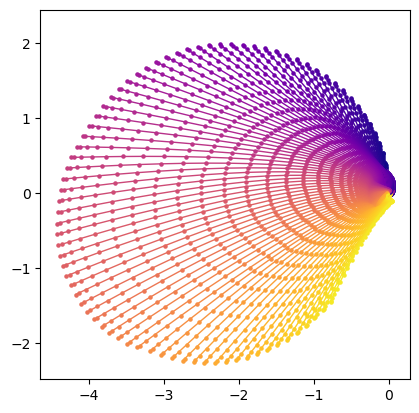

In [6]:
for index, thicknes in enumerate(thickness_range):
    plt.scatter(np.real(results_rec[index,:]),
                np.imag(results_rec[index,:]),
                color=cmap(index/max_thickness), s=5)
    plt.plot(np.real(results_rec[index,:]),
            np.imag(results_rec[index,:]),
            color=cmap(index/max_thickness), linewidth=1)
plt.axis("square")
plt.show()

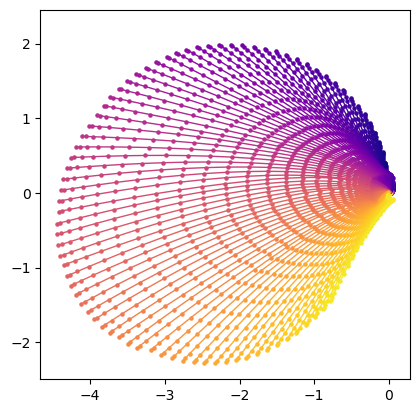

In [7]:
for index, thicknes in enumerate(thickness_range):
    plt.scatter(np.real(recover_rec[index,:]),
                np.imag(recover_rec[index,:]),
                color=cmap(index/max_thickness), s=5)
    plt.plot(np.real(recover_rec[index,:]),
                np.imag(recover_rec[index,:]),
                color=cmap(index/max_thickness), linewidth=1)
plt.axis("square")
plt.show()